# linear-regression-exercise

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="linear-regression-exercise")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/linear-regression-exercise" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/linear-regression-exercise


'https://jovian.ai/kishkath/linear-regression-exercise'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model

### Reading Data

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")

In [6]:
data.tail(5)

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


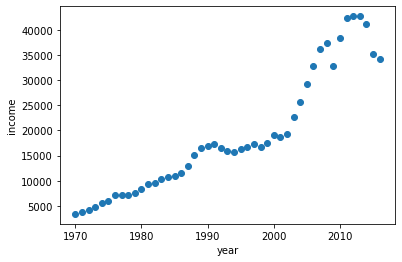

In [7]:
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(data.year,data.iloc[:,1])

###  Model Building

In [10]:
## linear_model

model = linear_model.LinearRegression()
model.fit(data[['year']],data.iloc[:,1])


LinearRegression()

### Model Prediction

In [13]:
model.predict([[2020]])


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [14]:
model.predict([[2000]])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24719.39258996])

In [15]:
model.predict([[2012]])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34660.97349264])

### Model Parameters

In [17]:
model.coef_

array([828.46507522])

In [18]:
model.intercept_

-1632210.7578554575

In [19]:
model.coef_ * (2012) + model.intercept_

array([34660.97349264])

### Insertion of Predictions, Loss values in dataset

In [24]:
newdata = model.predict([[i] for i in data.year])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
newdata

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [26]:
data['predicted'] = newdata

In [27]:
data

,year,per capita income (US$),predicted
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634
5,1975,5998.144346,4007.765709
6,1976,7062.131392,4836.230785
7,1977,7100.126170,5664.695860
8,1978,7247.967035,6493.160935
9,1979,7602.912681,7321.626010


In [28]:
data['loss'] = data.predicted - data.iloc[:,1]

In [29]:
data

,year,per capita income (US$),predicted,loss
0,1970,3399.299037,-134.559667,-3533.858704
1,1971,3768.297935,693.905409,-3074.392526
2,1972,4251.175484,1522.370484,-2728.805000
3,1973,4804.463248,2350.835559,-2453.627689
4,1974,5576.514583,3179.300634,-2397.213949
5,1975,5998.144346,4007.765709,-1990.378637
6,1976,7062.131392,4836.230785,-2225.900607
7,1977,7100.126170,5664.695860,-1435.430310
8,1978,7247.967035,6493.160935,-754.806100
9,1979,7602.912681,7321.626010,-281.286671


### Que; 

Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [30]:
model.predict([[2020]])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])